In [2]:
from sklearn.datasets import load_boston # boston datasetini aldık sklearn içerisinden
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor  # regression problemi için bunu import ettik
import pandas as pd
from sklearn.model_selection import train_test_split # train ve test için import ettik
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.neural_network import MLPClassifier # derin öğrenme ile sınıflandırma 
from sklearn.metrics import accuracy_score # doğruluk score'u
from sklearn.datasets import load_breast_cancer # meme kanseri verisini aldık

In [3]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense # hidden layer'lar için 

In [ ]:
data = load_breast_cancer()
print(data["DESCR"])

In [9]:
X = data["data"]
y = data["target"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3 )

X.shape

(569, 30)

In [12]:
model = Sequential([Dense(256,input_shape = (X.shape[1],), activation="relu"),  # classification için sadece columns gerekli
                    Dense(128, activation="relu"),
                    Dense(1, activation="sigmoid")]) 
model.summary()
# X.shape[1] kısmı için tupple olması gerekli o yüzden de bir virgül koyuyoruz, input shape'i her zaman tupple olarak vermeliyiz 
# output katmanımızın aktivasyon fonksiyonunun sigmoid olması gerekli çünkü 0 ile 1 arasında bir değer alacaktır 

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 256)               7936      
_________________________________________________________________
dense_10 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 129       
Total params: 40,961
Trainable params: 40,961
Non-trainable params: 0
_________________________________________________________________


In [25]:
val_control = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=50) 
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"]) 
history = model.fit(X_train,y_train,epochs=1000, verbose=0, batch_size=500, 
                    validation_split=0.1, callbacks=[val_control] )

# loss fonksiyonu için binary_crossentropy uyguladık
# 

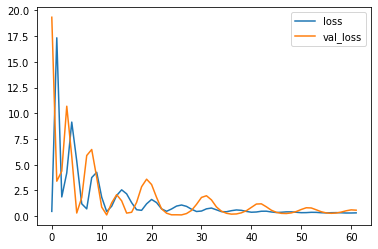

In [26]:
df = pd.DataFrame(history.history)
df[["loss","val_loss"]].plot() 
# 40.iterasyondan sonra demek ki iyileşme olmuyor diyebiliriz 
# patience 50 yaparsak ; 60'a yakın iterasyonda duruyor 

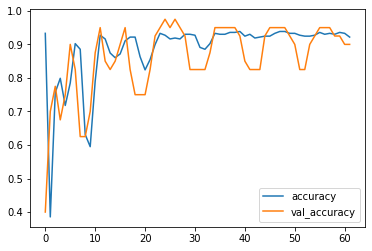

In [27]:
df[["accuracy","val_accuracy"]].plot() 
# accuracy %90'lara çıkıyor çokta kötü bir sonuç değil diyebiliriz, doğruluk yüzdesi

# Mnist datası 
MNIST Veri Tabanı (MNIST database)
MNIST veritabanı, çeşitli görüntü işleme sistemlerini eğitmek için yaygın olarak kullanılan büyük bir el yazısı rakam veritabanıdır. Veritabanı ayrıca makine öğrenimi alanında eğitim ve test için yaygın olarak kullanılmaktadır. NIST'in orijinal veri setlerinden örnekleri "yeniden karıştırarak" oluşturulmuştur.

In [19]:
(X_train,y_train),(X_test,y_test) = tf.keras.datasets.mnist.load_data()

In [5]:
X_train.shape
# 28'e 28'lik piksel'den oluşan 60000 tane image datası var 

(60000, 28, 28)

In [6]:
y_train
# her bir datanın hangi rakama tekabül ettiğini veriyor diyebiliriz 
# el ile yazılmış rakamları tahmin etmeye çalışacağız 0'dan 9'a kadar olan rakamları

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

Text(0.5, 1.0, '5')

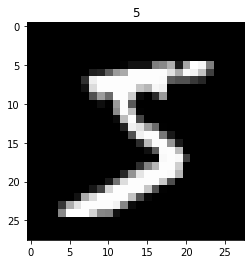

In [8]:
k = 0
plt.imshow(X_train[k],"gray")
#çizdirirsek ilk train datasını 5'e benzedğini söyleyebiliriz 
plt.title(y_train[k])

# y_train'de label değerini görebiliyoruz 
# 3*3'lük bir resim olsaydı 0 ile 255 arasındaki sayılar aslında her bir piksel için 

In [14]:
X_train = X_train.reshape([-1,28*28]) # -1 satır sayısını otomatik hesaplıyor, yeniden şekillendirdik ve liste olarak verdik reshape için 
X_test = X_test.reshape([-1,28*28])
# önceki datalarda da yapmadık kesinlikle yapmamız lazım normalize etmemiz lazım ya da standartize edeceğiz.
# 0 ile 1 arasında ortalamadan çıkarıp, standart sapmaya böleceğiz 
# image dataları için her zaman 0 ile 255 arasındadır, o yüzden basittir diyebiliriz
# normalize etmek modeli hızlandırıyor hem de geçerliliğini artıracaktır 
# decision tree hariç hemen hemen tüm makine öğrenmesi algoritmalarında geçerlidir 
X_train = X_train/255.0
X_test = X_test/255.0

model = Sequential([Dense(256,input_shape = (X_train.shape[1],), activation="relu"),  # 
                    Dense(128, activation="relu"),
                    Dense(10, activation="softmax")]) # burayı değiştirdik çünkü birden fazla kategori varsa softmax'ı kullanıyoruz, ve dense'i 10 yaptık, 10 kategori olduğu için
model.summary()

val_control = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=50) 
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"]) 
history = model.fit(X_train,y_train,epochs=10, verbose=1, batch_size=500, 
                    validation_split=0.1, callbacks=[val_control] )


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
108/108 [==============================] - 2s 17ms/step - loss: 0.8265 - accuracy: 0.7740 - val_loss: 0.1662 - val_accuracy: 0.9545
Epoch 2/10
108/108 [==============================] - 2s 14ms/step - loss: 0.1851 - accuracy: 0.9458 - val_loss: 0.1159 - val_accuracy: 0.9675
Epoch 3/10
108/108 [==============================] - 2s 14ms/step - loss: 0.1192 - accuracy

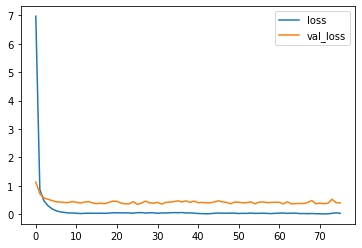

In [11]:
df = pd.DataFrame(history.history)
df[["loss","val_loss"]].plot() 
# bakarsal loss baya azalmış ve 70'de durmuş, validation_loss'da aynı şekilde azalmış bir noktada 

In [15]:
ypred = model.predict(X_test) # ypred'e bakarsak output olarak 0,0,0,1,0,0,0 gibi one-hot encoder sonuçlar veriyor 
ypred = np.argmax(ypred, axis = 1) #her bir satır için hangi sütüna denk geliyor onu bulmamız gerekiyor 
accuracy_score(y_test,ypred)
# score olarak %97'yi yakaladığımızı söyleyebiliriz 

0.9765

In [ ]:
# https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy buradan bakabiliriz
# output'u kontrol ettik, bizim output'umuz one-hot encoder olsaydı [0,1,0] gibi olurdu - categoricalcrossentropy kullanabilirdik 
# ama bizim output label encoder olduğu için, yani sadece labellar olduğu için, sparsecategoricalcrossentropy'i kullanacağız ,y_true = [1, 2]


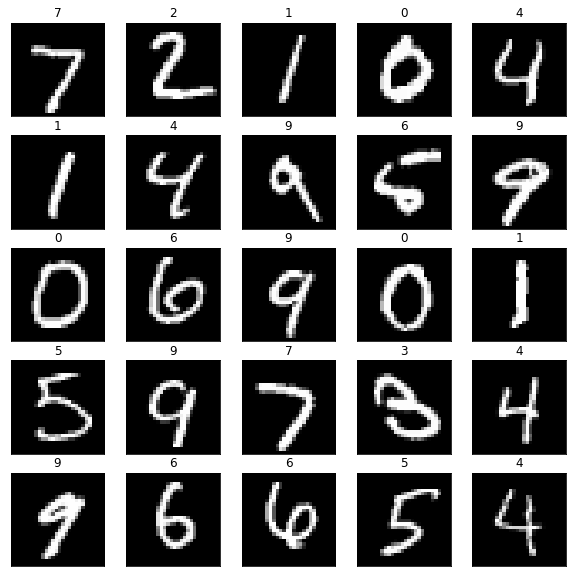

In [18]:
plt.figure(figsize=(10,10)) #10'a 10'luk bir graph oluşturduk 
for i in range(25): # 25 kez dönsün 
    plt.subplot(5,5,i+1) # 5 satır 5 sütunluk bir şey oluşturacağım
    plt.imshow(X_test[i,:].reshape(28,28), "gray") # 28'e 28'lik resme dönüştürdük "gray" olarak çağırdık 
    plt.title(ypred[i])
    plt.xticks([])
    plt.yticks([]) # burada her sayının üstünde yazan graph değerlerini çıkardık, boş kümeye atadık 

In [20]:
from tensorflow.keras.layers import Dense, Flatten # Flatten layer'ımızı ekledik 


In [21]:
# tekrar okuduk datayı 
#from tensorflow.keras.layers import Dense, Flatten # Flatten layer'ımızı ekledik 
(X_train,y_train),(X_test,y_test) = tf.keras.datasets.mnist.load_data()

X_train = X_train/255.0
X_test = X_test/255.0

model = Sequential([Flatten(input_shape=(28,28)),   # burada direk input_shape'i ekledik ve onu düz bir vektöre çevirmek istiyoruz yani flatten yapmak istiyoruz 
                    Dense(256,activation="relu"),  # artık burada input shape'e ihtiyacımız yok, aslında reshape yapmak yerine başlangıçta flatten kullanıyoruz
                    Dense(128, activation="relu"),
                    Dense(10, activation="softmax")]) 

val_control = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=50) 
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"]) 
history = model.fit(X_train,y_train,epochs=10, verbose=1, batch_size=500, 
                    validation_split=0.1, callbacks=[val_control] )

Epoch 1/10
108/108 [==============================] - 2s 15ms/step - loss: 0.8511 - accuracy: 0.7653 - val_loss: 0.1733 - val_accuracy: 0.9547
Epoch 2/10
108/108 [==============================] - 2s 14ms/step - loss: 0.1915 - accuracy: 0.9455 - val_loss: 0.1193 - val_accuracy: 0.9683
Epoch 3/10
108/108 [==============================] - 2s 15ms/step - loss: 0.1264 - accuracy: 0.9647 - val_loss: 0.1031 - val_accuracy: 0.9698
Epoch 4/10
108/108 [==============================] - 2s 14ms/step - loss: 0.0927 - accuracy: 0.9733 - val_loss: 0.0916 - val_accuracy: 0.9735
Epoch 5/10
108/108 [==============================] - 2s 14ms/step - loss: 0.0735 - accuracy: 0.9787 - val_loss: 0.0863 - val_accuracy: 0.9747
Epoch 6/10
108/108 [==============================] - 2s 14ms/step - loss: 0.0568 - accuracy: 0.9832 - val_loss: 0.0891 - val_accuracy: 0.9742
Epoch 7/10
108/108 [==============================] - 2s 15ms/step - loss: 0.0434 - accuracy: 0.9879 - val_loss: 0.0775 - val_accuracy: 0.9785